In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")

# Cab Data

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### Cab Data contains 7 columns.

In [4]:
# cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'], format='%y%m%d')

In [5]:
# cab.head()

In [6]:
cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [7]:
cab.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

### There are no null values!

In [8]:
cab["Date of Travel"].duplicated().sum()

358297

In [9]:
cab.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

### There are 2 cab service provider in 19 different cities

In [10]:
type(cab["Date of Travel"])

pandas.core.series.Series

In [11]:
# cab["Date of Travel"] = pd.to_datetime(cab["Date of Travel"])

In [12]:
# cab["Date of Travel"].dt.year

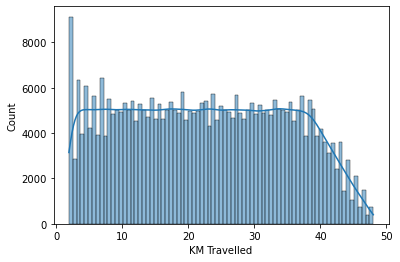

In [13]:
sns.histplot(cab['KM Travelled'], kde=True)

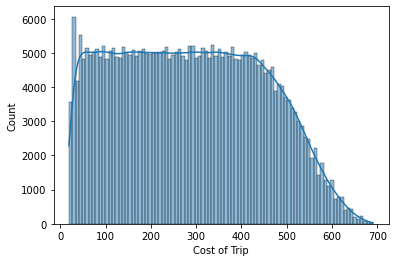

In [14]:
sns.histplot(cab['Cost of Trip'], kde=True)

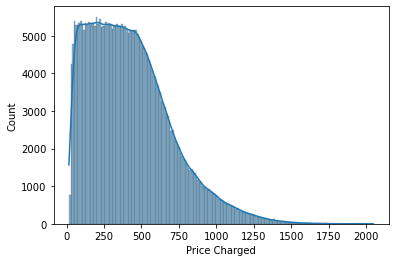

In [15]:
sns.histplot(cab['Price Charged'], kde=True)

### From the above three figs, we could see that the cost of trip is directly proportional to the km travelled, however Price charged (right skewed) is much more when compared to the cost.

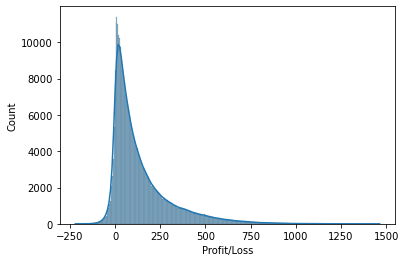

In [16]:
cab["Profit/Loss"] = cab["Price Charged"] - cab["Cost of Trip"]
sns.histplot(cab['Profit/Loss'], kde=True)

### Here a new column is created to determine the profit or loss.
### Again it is a right skewed graph which implies that cab service providers are making more profit than loss. Avg Profit is around $100

In [17]:
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit/Loss
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


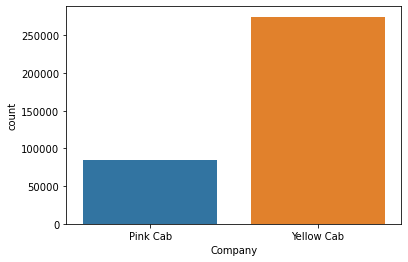

In [18]:
sns.countplot(cab["Company"])

In [19]:
cab["Company"].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

### It is clear from the above fig that are more yellow cabs than pink cabs. About 3x!!

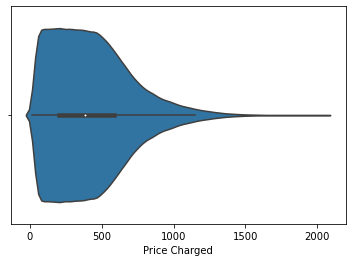

In [20]:
sns.violinplot(cab["Price Charged"])

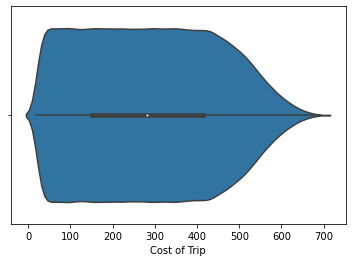

In [21]:
sns.violinplot(cab["Cost of Trip"])

In [22]:
cab["Price Charged"].sort_values(ascending=False)

138644    2048.03
138669    2016.70
138766    2013.95
247599    1993.83
138548    1981.05
           ...   
285213      16.76
132169      16.53
15884       16.38
246581      15.75
143508      15.60
Name: Price Charged, Length: 359392, dtype: float64

### Min Price charged: 15.60 
### Max Price charged: 2048.03

In [23]:
cab["Cost of Trip"].sort_values(ascending=False)

239548    691.20
198854    691.20
50001     691.20
119534    691.20
319327    691.20
           ...  
354348     19.19
85647      19.19
269738     19.19
101769     19.00
350858     19.00
Name: Cost of Trip, Length: 359392, dtype: float64

### Min Cost charged: 19.00 USD
### Max Cost charged: 691.20 USD

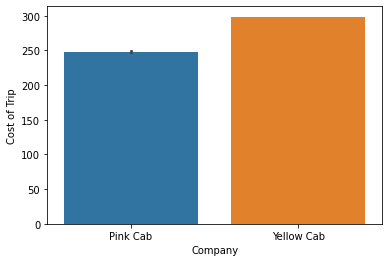

In [24]:
sns.barplot(y='Cost of Trip', x='Company', data=cab, estimator=np.mean)

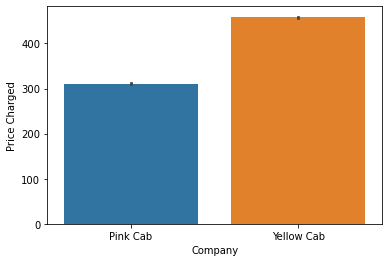

In [25]:
sns.barplot(y='Price Charged', x='Company', data=cab, estimator=np.mean)

### Cost and Price both are higher for yellow cabs when compared to pink cabs

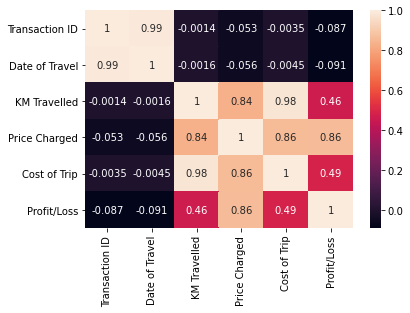

In [26]:
sns.heatmap(cab.corr(), color='b', annot=True)

### Light color => more correlation.
### KM Travelled is strongly correlated to Cost than the Price.

[Text(0, 0, 'ATLANTA GA'),
 Text(0, 0, 'ATLANTA GA'),
 Text(0, 0, 'ATLANTA GA'),
 Text(0, 0, 'ATLANTA GA'),
 Text(0, 0, 'ATLANTA GA'),
 Text(0, 0, 'ATLANTA GA'),
 Text(0, 0, 'AUSTIN TX'),
 Text(0, 0, 'AUSTIN TX'),
 Text(0, 0, 'BOSTON MA'),
 Text(0, 0, 'BOSTON MA'),
 Text(0, 0, 'BOSTON MA'),
 Text(0, 0, 'BOSTON MA'),
 Text(0, 0, 'BOSTON MA'),
 Text(0, 0, 'BOSTON MA'),
 Text(0, 0, 'BOSTON MA'),
 Text(0, 0, 'BOSTON MA'),
 Text(0, 0, 'BOSTON MA'),
 Text(0, 0, 'BOSTON MA'),
 Text(0, 0, 'BOSTON MA')]

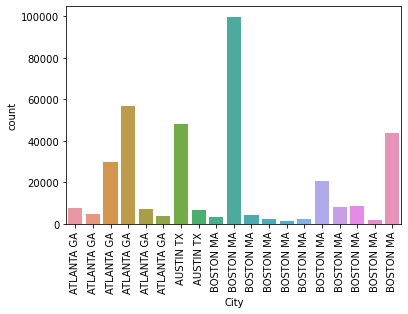

In [27]:
g = sns.countplot(cab['City'])
g.set_xticklabels(cab['City'], rotation = 90)

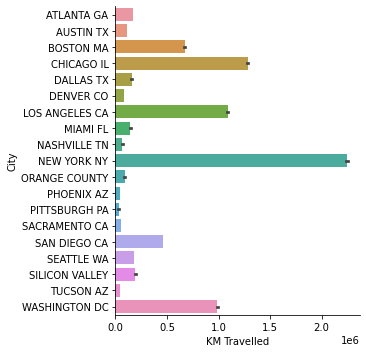

In [28]:
sns.factorplot(kind='bar', x='KM Travelled', y='City', data=cab, estimator=np.sum)

### New York City has the highest no. of KM Travelled!

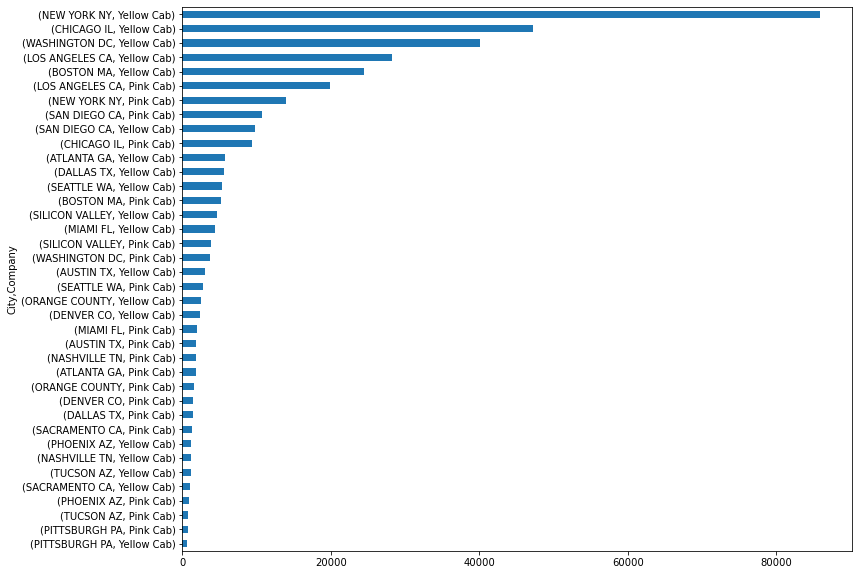

In [29]:
plt.figure(figsize=(12, 10))
cab.groupby('City').Company.value_counts().sort_values(ascending=True).plot(kind='barh')

### Again New York City has most of the cabs as Yellow Cabs

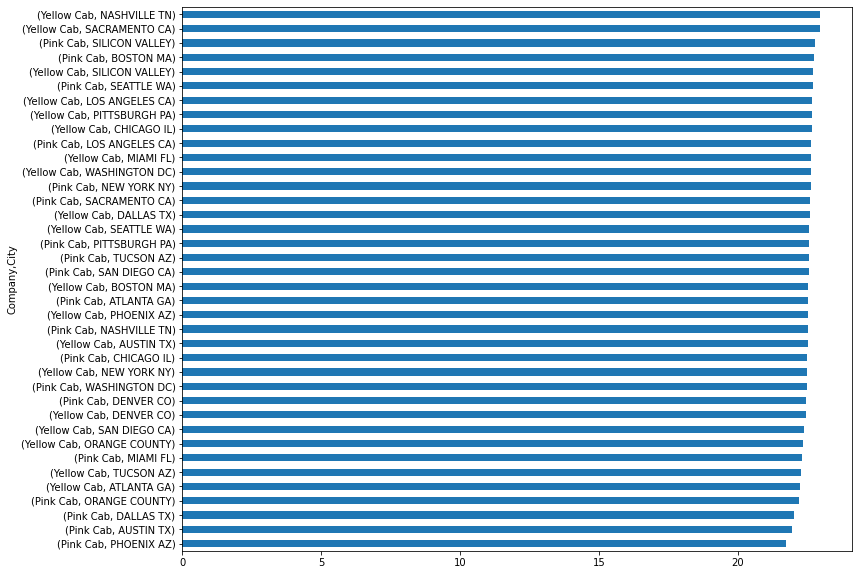

In [30]:
plt.figure(figsize=(12, 10))
cab.groupby(['Company','City'])['KM Travelled'].mean().sort_values(ascending=True).plot(kind='barh')

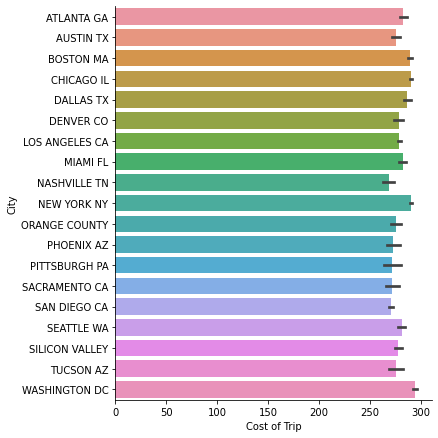

In [31]:
sns.catplot(kind = 'bar', x = 'Cost of Trip', y='City', data = cab, estimator = np.mean, height=6)

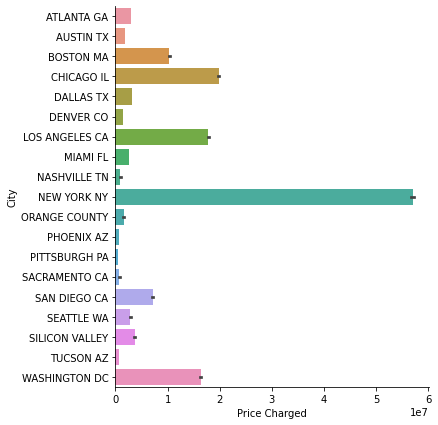

In [32]:
sns.catplot(kind = 'bar', x = 'Price Charged', y = 'City', data = cab, estimator = np.sum, height=6)

### Price charged is max for New York City. But the cost is almost the same as other cities. It could mean that New York city is expensive.

# City Data

In [33]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [34]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


### Since New York has the highest population, it is now clear that there are more no. of cabs in this city.

In [35]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,DALLAS TX,"1,177,609","69,995"
freq,1,1,1


In [36]:
city.isna().sum()

City          0
Population    0
Users         0
dtype: int64

# Customer Data

In [37]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [38]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [39]:
customer.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

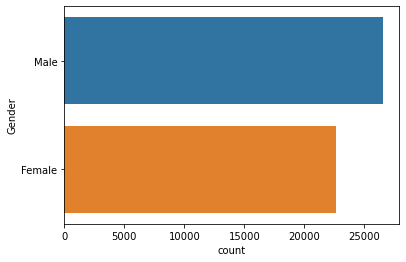

In [40]:
sns.countplot(y = 'Gender', data = customer)

### No concerning difference between no. of males and females

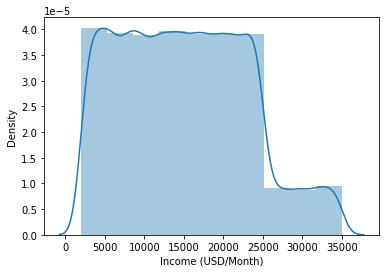

In [41]:
sns.distplot(customer['Income (USD/Month)'], bins = 10, hist = True, kde = True)

### Very few people earn > 25000 USD per month

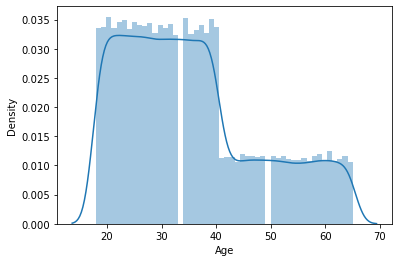

In [42]:
sns.distplot(customer['Age'], hist = True, kde = True)

### More no. of people are from the age-group of 20 - 40 years.

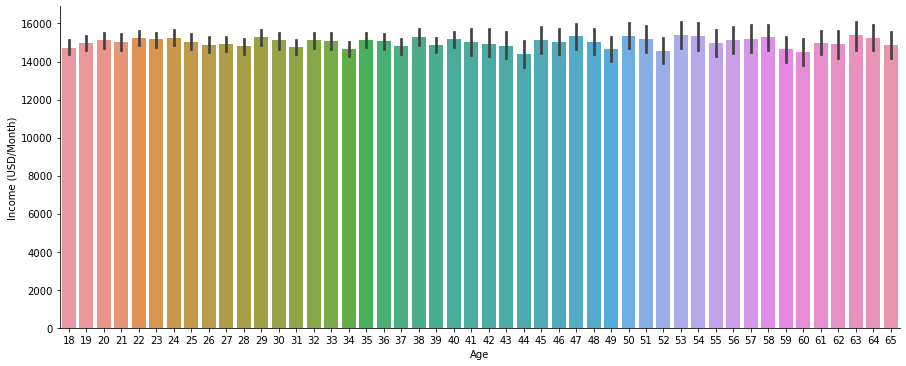

In [43]:
sns.catplot(kind = 'bar', x = 'Age', y = 'Income (USD/Month)', data = customer, estimator = np.mean, height = 5, aspect = 2.5)

### There is no/very litte correlation between Age and Income.

# Transaction Data

In [44]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [45]:
transaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [46]:
transaction.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

### No null values

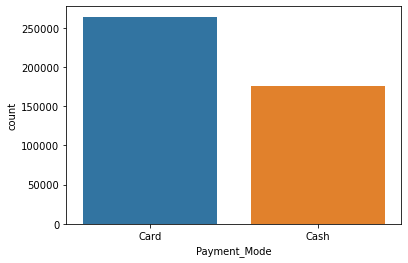

In [47]:
sns.countplot(transaction['Payment_Mode'])

In [48]:
transaction['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

### Card payement is preffered over cash payment. About 1.5x!!

# Merge Tables

In [49]:
cab_1 = pd.merge(cab, transaction, how='inner', on='Transaction ID')
cab_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit/Loss,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,27182,Card


In [50]:
cab_1.shape

(359392, 10)

In [51]:
df = pd.merge(cab_1, customer, how='inner', on='Customer ID')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit/Loss,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237


In [52]:
df.shape

(359392, 13)